In [1]:
# 1 (без номера)

class Math:
    
    pi = 3.141592653589793
    
    def __init__(self, mode = "rad", iters = 10):
        self.iters = iters
        self.mode = False
        if mode == "grad":
            self.mode = True
    
    def grad_to_rad(self, x):
        while x >= 360:
            x -= 360
        while x < 0:
            x += 360
        return x * self.pi / 180
    
    def rad_to_grad(self, x):
        while x > self.pi:
            x -= self.pi * 2
        while x <= -self.pi:
            x += self.pi * 2
        return x * 180 / self.pi
    
    @staticmethod
    def factorial(n):
        if n == 0:
            return 1
        out = 1.0
        for i in range(2, n + 1):
            out *= i
        return out
    
    def sin(self, x):
        if self.mode:
            x = self.grad_to_rad(x)
            
        out = x
        den = 1.0
        for i in range(1, self.iters + 1):
            den *= (i * 2) * (i * 2 + 1)
            if i % 2 == 0:
                out += x ** (i * 2 + 1) / den
            else:
                out -= x ** (i * 2 + 1) / den
        return out
    
    def cos(self, x):
        if self.mode:
            x = self.grad_to_rad(x)
        out = 1
        den = 2.0
        for i in range(1, self.iters + 1):
            if i % 2 == 0:
                out += x ** (i * 2) / den
            else:
                out -= x ** (i * 2) / den
            den *= (i * 2 + 1) * (i * 2 + 2)
        return out
    
    def tan(self, x):
        return self.sin(x) / self.cos(x)
    
    def asin(self, x):
        if x >= 1 or x <= -1:
            print("ERROR")
            return
        
        out = 0
        for i in range(self.iters):
            cur = self.factorial(i * 2)
            cur /= 4 ** i
            cur /= self.factorial(i) ** 2
            cur /= i * 2 + 1
            cur *= x ** (2 * i + 1)
            out += cur
        
        if self.mode:
            return self.rad_to_grad(out)
        return out
    
    def acos(self, x):
        if self.mode:
            return self.rad_to_grad(self.pi / 2) - self.asin(x)
        return self.pi / 2 - self.asin(x)
    
    def atan(self, x):
        if x >= 1 or x <= -1:
            print("ERROR")
            return
        
        out = 0
        for i in range(self.iters):
            cur = ((i % 2 == 0) - 0.5) * 2
            cur /= 2 * i + 1
            cur *= x ** (2 * i + 1)
            out += cur
        
        if self.mode:
            return self.rad_to_grad(out)
        return out
        

grad = Math("grad", iters = 5)
print("grad, iters = 5")
print("sin(30) = ", grad.sin(30), ",  asin(0.5) = ", grad.asin(0.5), sep='')
print("cos(60) = ", grad.cos(60), ",  acos(0.5) = ", grad.acos(0.5), sep='')
print("tan(15) = ", grad.tan(15), ", atan(tan(15)) = ", grad.atan(grad.tan(15)), '\n', sep='')

rad = Math("rad", iters = 20)
print("rad, iters = 20")
print("sin(pi/6)  = ", rad.sin(rad.pi / 6), ", asin(0.5) = ", rad.asin(0.5), sep='')
print("cos(pi/3)  = ", rad.cos(rad.pi / 3), ",  acos(0.5) = ", rad.acos(0.5), sep='')
print("tan(pi/12) = ", rad.tan(rad.pi / 12), ",  atan(tan(pi/12)) = ", rad.atan(rad.tan(rad.pi / 12)), '\n', sep='')

print("180 grad = ", rad.grad_to_rad(180), " rad", sep='')
print("pi/4 rad = ", rad.rad_to_grad(rad.pi / 4), " grad", sep='')


grad, iters = 5
sin(30) = 0.4999999999999643,  asin(0.5) = 29.999221911379855
cos(60) = 0.4999999963909432,  acos(0.5) = 60.000778088620145
tan(15) = 0.26794919243112264, atan(tan(15)) = 15.000002510315763

rad, iters = 20
sin(pi/6)  = 0.49999999999999994, asin(0.5) = 0.5235987755982972
cos(pi/3)  = 0.5000000000000001,  acos(0.5) = 1.0471975511965994
tan(pi/12) = 0.2679491924311226,  atan(tan(pi/12)) = 0.26179938779914946

180 grad = 3.141592653589793 rad
pi/4 rad = 45.0 grad


In [2]:
# 2 (без номера)

class Tree1:
    
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
    
    def set_right(self, right):
        self.right = right
    
    def set_left(self, left):
        self.left = left
    
    def get_list(self, l = []):
        if self.left:
            l.append([])
            self.left.get_list(l[-1])
        l.append(self.val)
        if self.right:
            l.append([])
            self.right.get_list(l[-1])
        return l

tree = Tree1(5)
tree.left = Tree1(3)
tree.right = Tree1(6)
tree.right.right = Tree1(7)
tree.left.left = Tree1(2)
tree.left.right = Tree1(4)
print(tree.get_list())        
    
    

[[[2], 3, [4]], 5, [6, [7]]]


In [3]:
# 3 (без номера)

class Tree2:
    
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
    
    def add(self, val):
        if val < self.val:
            if self.left:
                self.left.add(val)
            else:
                self.left = Tree2(val)
        elif val > self.val:
            if self.right:
                self.right.add(val)
            else:
                self.right = Tree2(val)
        else:
            print("ERROR: value ", val, " already exists", sep='')
    
    def get_list(self, l = []):
        if self.left:
            l.append([])
            self.left.get_list(l[-1])
        l.append(self.val)
        if self.right:
            l.append([])
            self.right.get_list(l[-1])
        return l

tree = Tree2(6)
tree.add(8)
tree.add(7)
tree.add(2)
tree.add(1)
tree.add(3)
tree.add(7)
tree.add(5)
tree.add(4)
print(tree.get_list())


ERROR: value 7 already exists
[[[1], 2, [3, [[4], 5]]], 6, [[7], 8]]


In [10]:
# 4 (без номера)

from sklearn.model_selection import train_test_split

x = [[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]
y = [0, 0, 0, 1, 1, 1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

x_train, x_test, y_train, y_test

([[-1, -1], [-2, -1], [3, 2], [2, 1], [-3, -2]],
 [[1, 1]],
 [0, 0, 1, 1, 0],
 [1])

[Text(0.5, 0.75, 'X[0] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

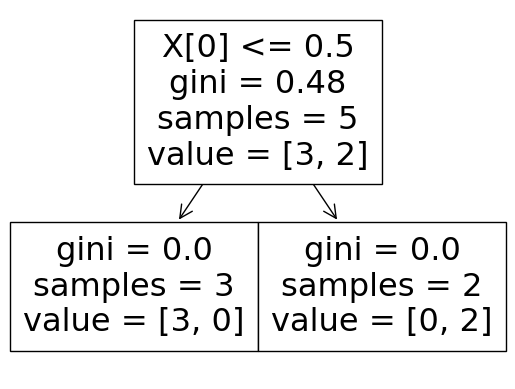

In [11]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
plot_tree(classifier)


In [12]:
y_pred = classifier.predict(x_test)
print("y_pred =", y_pred)
print("y_test =", y_test)

y_pred = [1]
y_test = [1]


In [44]:
# 5 (без номера)

from pandas import read_csv
url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
df = read_csv(url)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x, y

(array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
        [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
        [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
        ...,
        [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
        [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
        [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]]),
 array([5, 5, 5, ..., 6, 5, 6]))

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1519, 11), (80, 11), (1519,), (80,))

In [46]:
from sklearn.tree import DecisionTreeRegressor
from pandas import DataFrame
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = DataFrame({"Actual" : y_test, "Predicted" : y_pred})
df

,Actual,Predicted
0,6,7.0
1,5,5.0
2,5,6.0
3,5,6.0
4,5,5.0
...,...,...
75,5,5.0
76,5,7.0
77,6,6.0
78,6,6.0


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

MSE: 0.8125
MAE: 0.5125
